In [99]:
!pip install xgboost

     |████████████████████████████████| 157.5 MB 19 kB/s  eta 0:00:01
You should consider upgrading via the '/home/akansh/anaconda3/bin/python -m pip install --upgrade pip' command.


In [1]:
from sklearn.utils import shuffle
import sklearn 
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
import pandas as pd
import numpy as np
import random

### Objective is to create a Test data set. 
We have total 285 Patients recordings. We will be using 20 percent of data for testing purpose ie is 57 patients. 
These 57 patients will be unique and will not br present in training data. Distribution of these 57 patients will be as follows:

* 57 = 29 Asthma + 28 Non_Asthma 
* 29 Asthma = 15 Males + 14 Females
* 28 Non_Asthma = 14 Males + 14 Females

* Total Female = 14+14 = 28
* Total male = 14+15 = 29 

In [4]:
Asthmatic_Female = []
Asthmatic_Male = []
Healthy_Male = []
Healthy_Female = []
for root, dirs, files in os.walk("./"):
    for file in files:    
        if file.endswith('.wav'):
            if file.find('sthma') !=-1:
                if file.find("_M_")!=-1:
                    Asthmatic_Male.append(file)
                if file.find("_F_")!=-1:
                    Asthmatic_Female.append(file)
            if file.find("_C_")!=-1:
                if file.find("_M_")!=-1:
                    Healthy_Male.append(file)
                if file.find("_F_")!=-1:
                    Healthy_Female.append(file)
                



In [5]:
def train_test_set(Asthmatic_Female, Asthmatic_Male, Healthy_Female, Healthy_Male):
    test_set = np.concatenate(((np.random.choice(np.array(Asthmatic_Male), replace=False, size=(15)),
                                np.random.choice(np.array(Asthmatic_Female), replace=False, size=(14)),
                                np.random.choice(np.array(Healthy_Male), replace=False, size=(14)),
                                np.random.choice(np.array(Healthy_Female), replace=False, size=(14)))))
    train_set = np.concatenate((np.array(Asthmatic_Male),
                                np.array(Asthmatic_Female),
                                np.array(Healthy_Male),
                                np.array(Healthy_Female)))
    train_set = np.setdiff1d(train_set,test_set)
    return train_set, test_set
    

In [6]:
Train, Test = train_test_set((Asthmatic_Female), (Asthmatic_Male), (Healthy_Female), (Healthy_Male))

### Gender Ratio

In [28]:
len(Asthmatic_Female)/len(Asthmatic_Male)

0.79

In [29]:
len(Healthy_Female)/len(Healthy_Male)

0.9272727272727272

### Training Set

In [38]:
(len(Asthmatic_Female)-14)/(len(Asthmatic_Male)-15)

0.7647058823529411

In [37]:
(len(Healthy_Female)-14)/(len(Healthy_Male)-14)

0.9024390243902439

### Testing Set

### Loading Data from CSV file

In [7]:
Cough_dataframe = pd.read_csv("./MFCCs_stasts_Csv/Cough.csv")
Wheeze_dataframe = pd.read_csv("./MFCCs_stasts_Csv/Wheeze.csv")
Aaa_dataframe = pd.read_csv("./MFCCs_stasts_Csv/Aaa.csv")
Yee_dataframe = pd.read_csv("./MFCCs_stasts_Csv/Yee.csv")
Inhale_dataframe = pd.read_csv("./MFCCs_stasts_Csv/Inhale.csv")
Exhale_dataframe = pd.read_csv("./MFCCs_stasts_Csv/Exhale.csv")
Ooo_dataframe = pd.read_csv("./MFCCs_stasts_Csv/Ooo.csv")
Sss_dataframe = pd.read_csv("./MFCCs_stasts_Csv/Sss.csv")
Eee_dataframe = pd.read_csv("./MFCCs_stasts_Csv/Eee.csv")
Uuu_dataframe = pd.read_csv("./MFCCs_stasts_Csv/Uuu.csv")
Zzz_dataframe = pd.read_csv("./MFCCs_stasts_Csv/Zzz.csv")

### Train_Test_CSV

In [8]:
def train_test_csv(sound_dataframe, Asthmatic_Female, Asthmatic_Male, Healthy_Female, Healthy_Male):
    Train, Test = train_test_set((Asthmatic_Female), (Asthmatic_Male), (Healthy_Female), (Healthy_Male))     

    test_dataframe = pd.DataFrame()
    for i, line in enumerate(Test):
        A = sound_dataframe[(sound_dataframe['73'] == (Test[i].strip(".wav")+".json"))]
        test_dataframe = pd.DataFrame.append(test_dataframe,A)
        
        
    train_dataframe = pd.DataFrame()
    for i, line in enumerate(Train):
        A = sound_dataframe[(sound_dataframe['73'] == (Train[i].strip(".wav")+".json"))]
        train_dataframe = pd.DataFrame.append(train_dataframe,A) 
        
        
    
    return train_dataframe, test_dataframe

### Cough 

Objective is to use Cough sound for detection of Asthma, We will be using following Agorithms and compare the accuracy results. 

* K-NEAREST NEIGHBOUR
* Random Forest
* Support Vector Machine
* xgboost
* 
* 


In [9]:
#Machine Learning Algorithm (MLA) Selection and Initialization
def MLA_selection(sound_dataframe):    
    MLA = [
        #Ensemble Methods
        ensemble.AdaBoostClassifier(),
        ensemble.BaggingClassifier(),
        ensemble.ExtraTreesClassifier(),
        ensemble.GradientBoostingClassifier(),
        ensemble.RandomForestClassifier(),

        #Gaussian Processes
        gaussian_process.GaussianProcessClassifier(),

        #GLM
        linear_model.LogisticRegressionCV(),
        linear_model.PassiveAggressiveClassifier(),
        linear_model.RidgeClassifierCV(),
        linear_model.SGDClassifier(),
        linear_model.Perceptron(),

        #Navies Bayes
        naive_bayes.BernoulliNB(),
        naive_bayes.GaussianNB(),

        #Nearest Neighbor
        neighbors.KNeighborsClassifier(),

        #SVM
        svm.SVC(probability=True),
        svm.NuSVC(probability=True),
        svm.LinearSVC(),

        #Trees    
        tree.DecisionTreeClassifier(),
        tree.ExtraTreeClassifier(),

        #Discriminant Analysis
        discriminant_analysis.LinearDiscriminantAnalysis(),
        discriminant_analysis.QuadraticDiscriminantAnalysis(),


        XGBClassifier()    
        ]


    MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean' ]
    MLA_compare = pd.DataFrame(columns = MLA_columns)
    row_index = 0
    for alg in MLA:
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
        test = []
        train = []
        for i in range(0,5):
            train_csv, test_csv = train_test_csv(sound_dataframe, Asthmatic_Female, Asthmatic_Male, Healthy_Female, Healthy_Male)
            X_train = train_csv.iloc[:,:72]
            y_train = train_csv.iloc[:,72]
            X_test = test_csv.iloc[:,:72]
            y_test = test_csv.iloc[:,72]
            #Scaling
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
            X_train = pd.DataFrame(X_train)
            X_test = pd.DataFrame(X_test)

            alg.fit(X_train,y_train)
            test.append(metrics.accuracy_score(y_test,alg.predict(X_test)))

            train.append(metrics.accuracy_score(y_train,alg.predict(X_train)))

        MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = np.mean(train) 
        MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = np.mean(test)



        row_index+=1

    
    MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
    
    return MLA_compare

In [10]:
MLA_Cough = MLA_selection(Cough_dataframe)

[15:51:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:51:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:51:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:51:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

### Tuning the model

In [12]:
MLA_Cough

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.92066,0.74521
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.949014,0.732459
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.916148,0.704938
12,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.738453,0.701617
21,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",1,0.700095
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.792801,0.70008
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': 'warn',...",0.765722,0.692936
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.808325,0.690919
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.995641,0.682553
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",1,0.680986


In [33]:
import seaborn as sns
from sklearn.decomposition import PCA
X_train = Cough_dataframe.iloc[:,:72]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
pca=PCA(n_components=8)
pca.fit(X_train)
x_pca=pca.transform(X_train)

In [34]:
x_pca = pd.DataFrame(x_pca)

In [25]:
Cough_dataframe

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.615733,-9.970137,-7.241933,-4.103445,-6.759619,-19.864215,-16.528759,-26.176028,-0.824098,8.901177,...,12.788566,27.371903,22.346669,28.156765,14.120523,14.459622,13.028791,9.746071,1.0,2030_P_Asthma_M_after_TBD_Y.json
1,0.992417,-6.489085,-3.518956,-6.057403,-4.132932,-16.196171,-15.501757,-30.982091,-5.740059,16.505959,...,10.949760,23.553080,25.160808,32.639837,14.905146,20.648245,12.270386,20.210486,1.0,2030_P_Asthma_M_after_TBD_Y.json
2,-2.157643,-8.094567,-6.131985,-17.472562,-3.447475,-13.517850,-10.633528,-23.875145,-17.333512,18.393789,...,11.379040,17.591102,19.915107,28.480970,24.046599,27.476368,12.652755,12.290743,1.0,2030_P_Asthma_M_after_TBD_Y.json
3,-0.248061,0.649425,-2.912728,-14.327520,9.611136,-20.656158,-16.893974,-26.635411,-16.693907,22.911783,...,13.852405,23.417583,19.969007,29.374194,19.435507,26.159306,13.766238,16.322021,1.0,2030_P_Asthma_M_after_TBD_Y.json
4,-0.950996,-6.353987,4.957389,-7.233921,6.983457,-21.088038,-18.511702,-21.702749,-12.993295,23.715916,...,13.070769,26.207263,21.564135,24.933281,17.207826,29.802486,13.090878,14.346504,1.0,2030_P_Asthma_M_after_TBD_Y.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,0.018836,-0.814084,-1.896009,-10.002018,-2.097172,-0.442508,7.767054,-13.118261,-3.668487,9.116965,...,15.778356,8.267561,12.747798,17.227981,13.492128,13.967905,14.444222,12.137008,0.0,1306_C_Na_M_Na_Na_N.json
2822,-0.241761,-0.301691,-2.720360,-7.170009,2.997765,0.541130,8.403163,-10.823270,-4.610035,6.619595,...,10.845486,8.381817,12.471821,15.605929,14.425466,14.270717,10.453012,10.334178,0.0,1306_C_Na_M_Na_Na_N.json
2823,0.486481,-1.818497,-4.962188,-6.279613,-1.490915,4.392772,0.990837,-7.893083,1.540336,0.786436,...,9.209733,9.747618,9.854675,14.448393,12.862862,12.411324,12.642372,9.120956,0.0,1306_C_Na_M_Na_Na_N.json
2824,-2.067862,-5.029107,-9.788440,-7.745967,-4.384778,3.239237,3.905629,-9.502718,5.768557,3.233259,...,12.038441,10.074555,12.167020,16.368743,15.389061,11.078386,10.297016,13.143589,0.0,1306_C_Na_M_Na_Na_N.json


In [40]:
x_pca = pd.concat([x_pca,Cough_dataframe.iloc[:,72]], axis = 1)

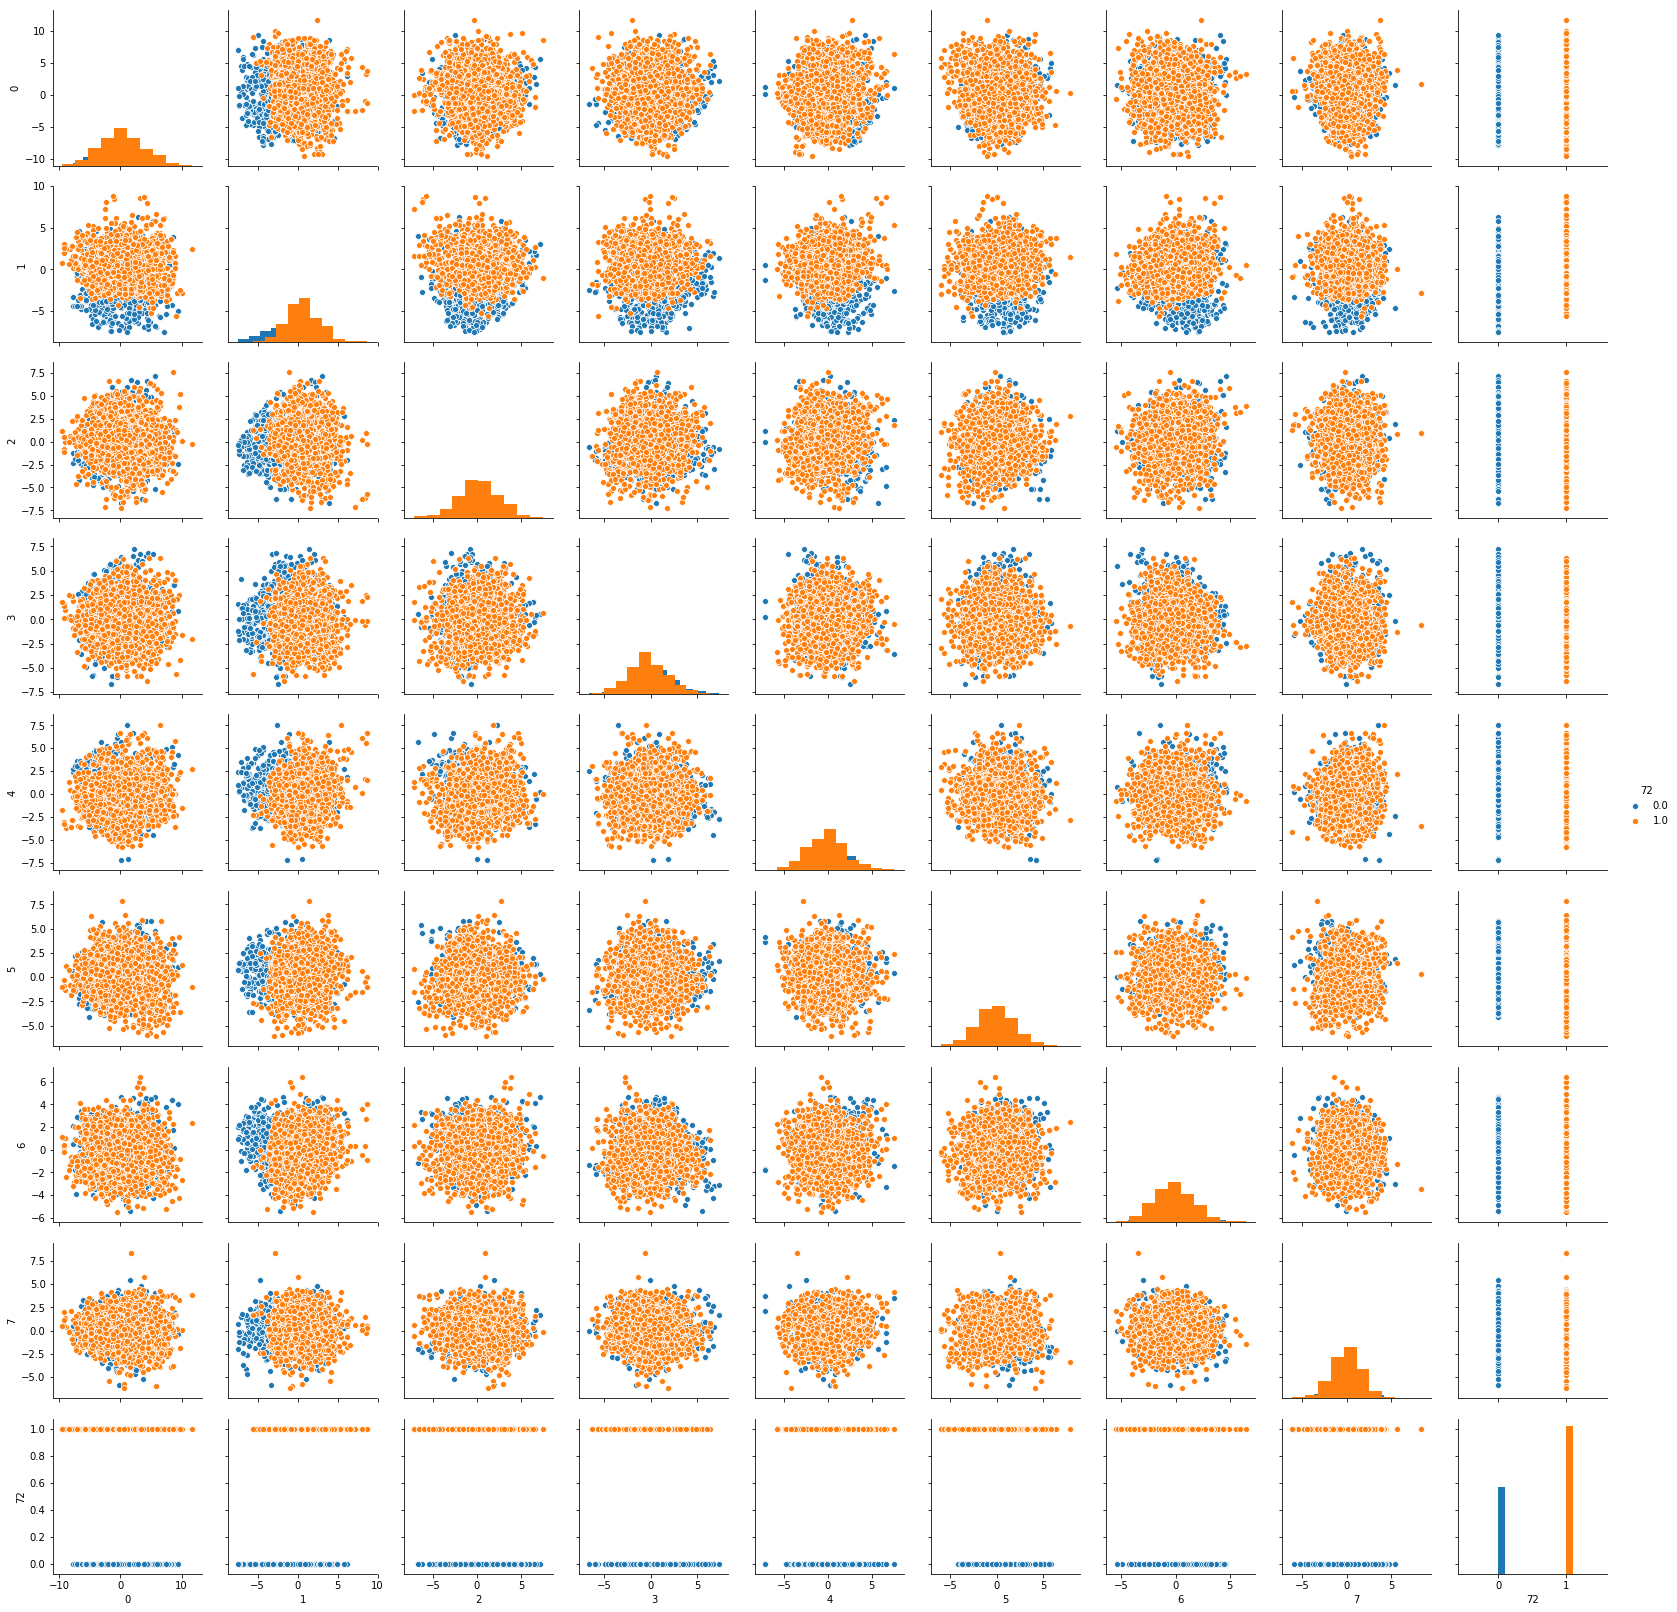

In [43]:
sns.pairplot(x_pca, hue = '72', diag_kind='hist')

### Wheeze

In [146]:
MLA_selection(Wheeze_dataframe)

[13:05:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:05:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:05:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:05:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': 'warn',...",0.88125,0.852255
21,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",1,0.85225
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.994098,0.823978
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.995347,0.82071
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.891689,0.813726
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.974327,0.810966
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",1,0.80856
9,SGDClassifier,"{'alpha': 0.0001, 'average': False, 'class_wei...",0.830004,0.800739
11,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.82048,0.796929
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.900003,0.79304


#### Inhale

In [147]:
MLA_selection(Inhale_dataframe)

[13:09:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:09:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:09:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:09:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.923575,0.752452
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.806927,0.733766
12,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.73054,0.732425
11,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.736111,0.730605
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.808479,0.728973
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.806829,0.726615
21,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",1,0.723119
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.854919,0.717562
20,QuadraticDiscriminantAnalysis,"{'priors': None, 'reg_param': 0.0, 'store_cova...",0.882956,0.699125
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.946792,0.698029


#### Exhale

In [148]:
MLA_selection(Exhale_dataframe)


[13:10:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:10:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:10:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:10:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.82953,0.74292
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.823697,0.741937
9,SGDClassifier,"{'alpha': 0.0001, 'average': False, 'class_wei...",0.766573,0.737219
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.995823,0.735647
11,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.76847,0.727032
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.993508,0.726524
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': 'warn',...",0.825518,0.725138
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.826329,0.722109
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.9442,0.717577
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.956348,0.715327


### Aaa

In [149]:
MLA_selection(Aaa_dataframe)

[13:10:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:10:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:10:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:10:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.968465,0.678248
21,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",1,0.671678
11,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.677089,0.654746
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.94982,0.646671
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.99643,0.646356
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.772285,0.640603
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.977096,0.629077
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.994494,0.626999
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.78634,0.624352
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.945705,0.620285


### Yee

In [150]:
MLA_selection(Yee_dataframe)

[13:11:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:11:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:11:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:11:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.882359,0.699904
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.953481,0.676625
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.798155,0.671341
21,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",1,0.664465
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.978251,0.663637
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.994309,0.659791
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.951779,0.650834
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.792075,0.643731
7,PassiveAggressiveClassifier,"{'C': 1.0, 'average': False, 'class_weight': N...",0.698673,0.637691
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': 'warn',...",0.775481,0.637583


### Eee

In [151]:
MLA_selection(Eee_dataframe)

[13:12:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:12:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:12:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:12:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.995183,0.667198
21,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",1,0.649769
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.943101,0.647382
11,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.704919,0.643867
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.978856,0.643365
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.802151,0.642714
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.796254,0.639569
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.93676,0.639507
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.876541,0.637498
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",1,0.636886


### Uuu

In [152]:
MLA_selection(Uuu_dataframe)

[13:13:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:13:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:13:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:13:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean
21,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",1,0.703191
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.996761,0.687287
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.980469,0.68102
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.797695,0.668387
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.994818,0.667466
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.946454,0.667457
11,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.721155,0.665748
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.973468,0.659891
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.880962,0.654305
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",1,0.645722


### ooo

In [155]:
MLA_selection(Ooo_dataframe)

[13:15:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:15:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:15:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:15:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.994294,0.68726
21,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",1,0.673377
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.97049,0.65673
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.953629,0.639404
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.996598,0.634064
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.934743,0.632793
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",1,0.629813
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",1,0.629671
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.863233,0.620291
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.976318,0.611954


### Sss

In [153]:
MLA_selection(Sss_dataframe)

[13:13:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:13:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:13:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:13:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.932952,0.714142
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.931827,0.712029
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.981261,0.708846
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.993667,0.700857
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.876727,0.698895
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': 'warn',...",0.782595,0.697174
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",1,0.695549
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.807507,0.691415
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.816536,0.684536
7,PassiveAggressiveClassifier,"{'C': 1.0, 'average': False, 'class_weight': N...",0.7079,0.679107


### Zzz

In [154]:
MLA_selection(Zzz_dataframe)

[13:14:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:14:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:14:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:14:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.95535,0.676658
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.981303,0.66224
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.933899,0.66184
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.771585,0.66138
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': 'warn',...",0.737164,0.659202
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.996064,0.656871
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.991985,0.646893
21,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",1,0.645491
20,QuadraticDiscriminantAnalysis,"{'priors': None, 'reg_param': 0.0, 'store_cova...",0.898657,0.636008
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.78788,0.625782
